In [1]:
!pip install networkx
!pip install matplotlib
!pip install pgmpy



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\vuqua\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


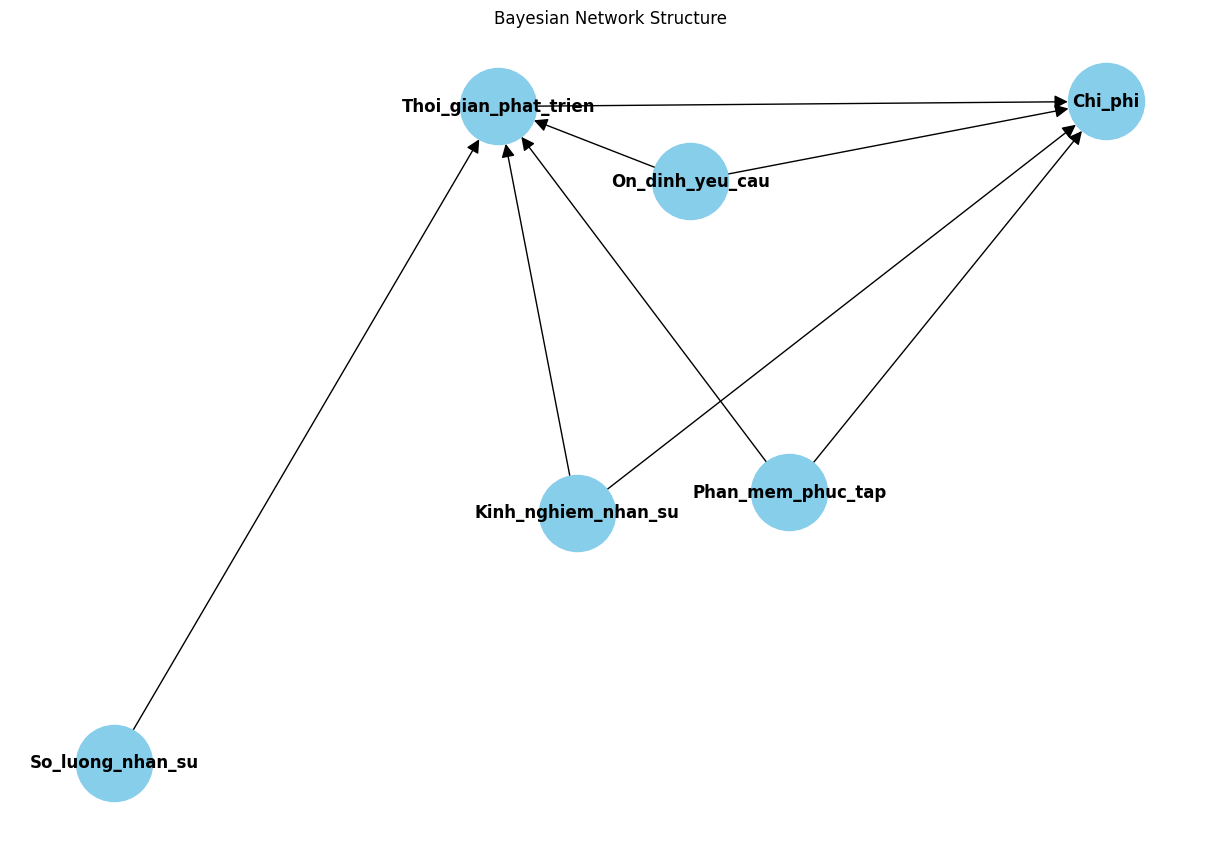

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Xác định các biến và mối quan hệ
variables = [
    "So_luong_nhan_su",
    "Thoi_gian_phat_trien",
    "Phan_mem_phuc_tap",
    "On_dinh_yeu_cau",
    "Kinh_nghiem_nhan_su",
    "Chi_phi"
]

edges = [
    ("So_luong_nhan_su", "Thoi_gian_phat_trien"),
    ("Phan_mem_phuc_tap", "Thoi_gian_phat_trien"),
    ("Phan_mem_phuc_tap", "Chi_phi"),
    ("On_dinh_yeu_cau", "Thoi_gian_phat_trien"),
    ("On_dinh_yeu_cau", "Chi_phi"),
    ("Kinh_nghiem_nhan_su", "Thoi_gian_phat_trien"),
    ("Kinh_nghiem_nhan_su", "Chi_phi"),
    ("Thoi_gian_phat_trien", "Chi_phi")
]

# Tạo mô hình mạng Bayesian
model = BayesianNetwork(edges)

# Xây dựng CPD cho từng biến
cpd_so_luong_nhan_su = TabularCPD(variable="So_luong_nhan_su", variable_card=3, values=[[0.3], [0.5], [0.2]])
cpd_phan_mem_phuc_tap = TabularCPD(variable="Phan_mem_phuc_tap", variable_card=2, values=[[0.6], [0.4]])
cpd_on_dinh_yeu_cau = TabularCPD(variable="On_dinh_yeu_cau", variable_card=2, values=[[0.7], [0.3]])
cpd_kinh_nghiem_nhan_su = TabularCPD(variable="Kinh_nghiem_nhan_su", variable_card=3, values=[[0.4], [0.4], [0.2]])

# CPD cho biến phụ thuộc
cpd_thoi_gian_phat_trien = TabularCPD(variable="Thoi_gian_phat_trien", variable_card=3,
                                      values=[[0.1] * 36,
                                              [0.3] * 36,
                                              [0.6] * 36],
                                      evidence=["So_luong_nhan_su", "Phan_mem_phuc_tap", "On_dinh_yeu_cau", "Kinh_nghiem_nhan_su"],
                                      evidence_card=[3, 2, 2, 3])

cpd_chi_phi = TabularCPD(variable="Chi_phi", variable_card=3,
                         values=[[0.2] * 36,  # Đảm bảo 36 giá trị
                                 [0.5] * 36,
                                 [0.3] * 36],
                         evidence=["Thoi_gian_phat_trien", "Phan_mem_phuc_tap", "On_dinh_yeu_cau", "Kinh_nghiem_nhan_su"],
                         evidence_card=[3, 2, 2, 3])

# Thêm các CPD vào mô hình
model.add_cpds(cpd_so_luong_nhan_su, cpd_phan_mem_phuc_tap, cpd_on_dinh_yeu_cau, cpd_kinh_nghiem_nhan_su, cpd_thoi_gian_phat_trien, cpd_chi_phi)

# Kiểm tra tính hợp lệ của mô hình
assert model.check_model()

# Tạo đồ thị sử dụng networkx
G = nx.DiGraph()

# Thêm các đỉnh (nút) vào đồ thị
G.add_nodes_from(variables)

# Thêm các cạnh (quan hệ) vào đồ thị
G.add_edges_from(edges)

# Vẽ đồ thị sử dụng matplotlib
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Tạo layout cho đồ thị
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
plt.title("Bayesian Network Structure")
plt.show()
